<a href="https://colab.research.google.com/github/MukeshAofficial/Dark-pattern-detection/blob/main/Airways_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To scrape cutomer reviews of British Airlines and analyse the data collected for usable Insights

In [1]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import re
import string
import seaborn as sns
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Webscrape and Analysis

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page=10
page_size=100
reviews=[]

for i in range(1,page+1):
  print(f'scrapping page {i}')
  url= url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
  response=requests.get(url)
  content=response.content
  soup=BeautifulSoup(content,'html.parser')
  for para in soup.find_all('div',{"class":"text_content"}):
    reviews.append(para.get_text())
  print(f'    {len(reviews)}  total reviews')

scrapping page 1
    100  total reviews
scrapping page 2
    200  total reviews
scrapping page 3
    300  total reviews
scrapping page 4
    400  total reviews
scrapping page 5
    500  total reviews
scrapping page 6
    600  total reviews
scrapping page 7
    700  total reviews
scrapping page 8
    800  total reviews
scrapping page 9
    900  total reviews
scrapping page 10
    1000  total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Worst service ever. Lost bag...
1,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
2,✅ Trip Verified | Not a great experience. I co...
3,Not Verified | I was excited to fly BA as I'd ...
4,Not Verified | I just want to warn everyone o...


In [5]:
df.to_csv("airways_review")

In [6]:
df1=pd.read_csv('/content/airways_review')
df1.reset_index(drop=True,inplace=True)
print(df1['reviews'])

0      ✅ Trip Verified | Worst service ever. Lost bag...
1      ✅ Trip Verified |  BA 246 21JAN 2023 Did not a...
2      ✅ Trip Verified | Not a great experience. I co...
3      Not Verified | I was excited to fly BA as I'd ...
4      Not Verified |  I just want to warn everyone o...
                             ...                        
995    ✅ Trip Verified |  Doha to London Heathrow. Fl...
996    ✅ Trip Verified |  Miami to Tel Aviv via Londo...
997    ✅ Trip Verified |  London to Seoul. I normally...
998    ✅ Trip Verified |  London Heathrow to New York...
999    ✅ Trip Verified | San Diego to London. From th...
Name: reviews, Length: 1000, dtype: object


In [7]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


Preprocessing of Data


In [8]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)


     Unnamed: 0                                            reviews
0             0  worst service ever. lost baggage because of de...
1             1    ba 246 21jan 2023 did not appreciate the unp...
2             2  a great experience. i could not check in onlin...
3             3  i was excited to fly ba as i'd not travelled w...
4             4  i just want to warn everyone of the worst cust...
..          ...                                                ...
995         995  doha to london heathrow. flight on time, not c...
996         996  miami to tel aviv via london. at miami airport...
997         997  london to seoul. i normally fly business but t...
998         998  london heathrow to new york jfk. bag drop did ...
999         999  san diego to london. from the moment that i bo...

[1000 rows x 2 columns]


In [9]:
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      worst service ever lost baggage because of del...
1        ba 246 21jan 2023 did not appreciate the unp...
2      a great experience i could not check in online...
3      i was excited to fly ba as id not travelled wi...
4      i just want to warn everyone of the worst cust...
                             ...                        
995    doha to london heathrow flight on time not com...
996    miami to tel aviv via london at miami airport ...
997    london to seoul i normally fly business but th...
998    london heathrow to new york jfk bag drop did n...
999    san diego to london from the moment that i boa...
Name: reviews, Length: 1000, dtype: object


<ipython-input-9-eab9b06e4612>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [10]:
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

  ba 246 21jan 2023 did not appreciate the unprofessional attitude of the pilots flight scheduled departure 1620 advised boarding time 1520 whole flight full of passengers waiting at the gate to board at 1520 1540 the cabin crew board 1555 the pilots board  each with a sao paulo airport duty free branded shopping bag 1620 the flight is still boarding finally pushes back just before 1700 40 minutes late captain came on the intercom to announce the delay was due to traffic between the crew hotel and the airport sorry captain the whole plane saw you and your pilot colleagues board fifteen minutes after the cabin crew clutching your duty free that you and your pilot colleagues still made time to stop for
['worst', 'service', 'ever', 'lost', 'baggage', 'because', 'of', 'delayed', 'flight', 'and', 'missed', 'connection', 'and', 'no', 'one', 'is', 'helping', 'to', 'get', 'it', 'back', 'british', 'airways', 'website', 'is', 'broken', 'so', 'it', 'doesnt', 'let', 'me', 'fill', 'missing', 'repor

Remove StopWords

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  worst service ever lost baggage delayed flight...
1            1  ba 246 21jan 2023 appreciate unprofessional at...
2            2  great experience could check online two separa...
3            3  excited fly ba id travelled long haul 25yrs iv...
4            4  want warn everyone worst customer service expe...
5            5  paid business class travelling cairo london he...
6            6  plane extremely dirty chocolate smudged mine c...
7            7  overall journey wasnt bad however end baggage ...
8            8  overall satisfied ground staff member yvr extr...
9            9  always fly ba total shambles booked manchester...
10          10  first time using ba business class pleased ser...
11          11  extremely rude ground service nonrev flying lo...
12          12  son flew geneva last sunday skiing holiday les...
13          13  price paid bought sale decent experience altho...
14        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None



def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'


df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)


     Unnamed: 0                                            reviews  polarity  \
0             0  worst service ever lost baggage delayed flight... -0.257143   
1             1  ba 246 21jan 2023 appreciate unprofessional at...  0.062500   
2             2  great experience could check online two separa...  0.190043   
3             3  excited fly ba id travelled long haul 25yrs iv...  0.083712   
4             4  want warn everyone worst customer service expe...  0.077778   
..          ...                                                ...       ...   
995         995  doha london heathrow flight time completely fu... -0.026754   
996         996  miami tel aviv via london miami airport octobe...  0.357143   
997         997  london seoul normally fly business last minute...  0.127820   
998         998  london heathrow new york jfk bag drop go well ...  0.301407   
999         999  san diego london moment boarded flight due tak... -0.079487   

          tag  
0    Negative  
1    Po

In [23]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    34.8
Neutral      1.5
Positive    63.7
dtype: float64

Visualizing the results

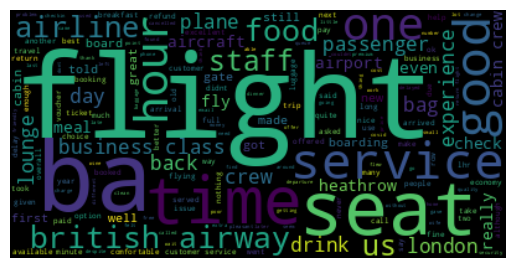

In [32]:
text = " "
for i in df1.index:
    if df1['tag'][i] == "Positive":
        text = text + df1['reviews'][i]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

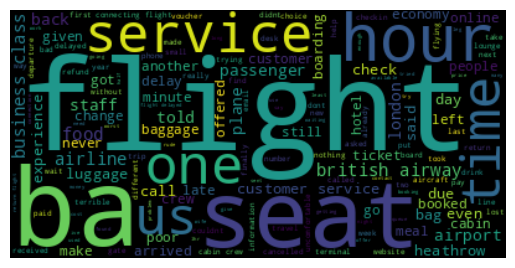

In [34]:
text = " "
for i in df1.index:
    if df1['tag'][i] == "Negative":
        text = text + df1['reviews'][i]

wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

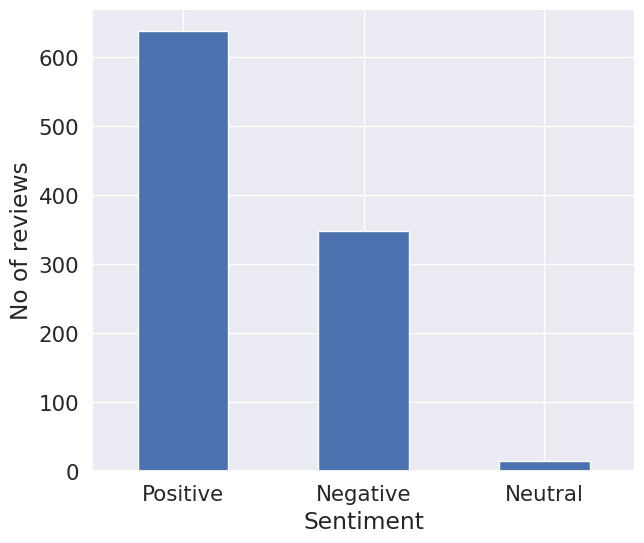

In [44]:
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment")
plt.ylabel("No of reviews")
plt.show()
